# Produção e aniquilação de pares

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import sys

sys.path.insert(0, "../")

from scipy.optimize import curve_fit
from scipy.signal import gaussian
from scipy.ndimage import filters
from scipy.integrate import simps

from common import *

%matplotlib inline

Neste experimento observamos, no espectro do ${}^{22}$Na, a aniquilação de pósitrons. O ${}^{22}$Na é um $\beta^+$ emissor. Os pósitrons emitidos pelos núcleos de Sódio rapidamente encontram um elétron e aniquilam-se, produzindo dois fótons, cada um com energia igual à energia de repouso do elétron, i.e., cerca de $511$ keV. Vista do centro de massa, após a colisão os dois fótons produzidos saem diametralmente opostos. Como a energia cinética do pósitron emitida não é tão alta, os fótons produzidos saem, no referencial do laboratório, com ângulo muito próximo de 180$^\circ$. Apenas um destes fótons pode então ser detectado pelo detector.

Como efeito disto observamos, no espectro $\gamma$ do ${}^{22}$Na, um pico com energia de cerca de $511 keV$. Há também um outro pico devido a uma transição $\gamma$ e um terceiro pico de soma dos outros dois, que ocorre pois o detector às vezes é incapaz de diferenciar dois fótons que chegam em tempos muito próximos.

In [4]:
data_dir = '../../dados/'
arquivo = os.path.join(data_dir, 'na22_15032017_1622.tsv')

pars_calibracao = np.array([3.8215880409588541e-05, 0.031908378390707419, 6.140984458104163])
incertezas_calibracao = np.array([2.0005452742905427e-05, 0.013574765061956408, 2.0394318835612819])

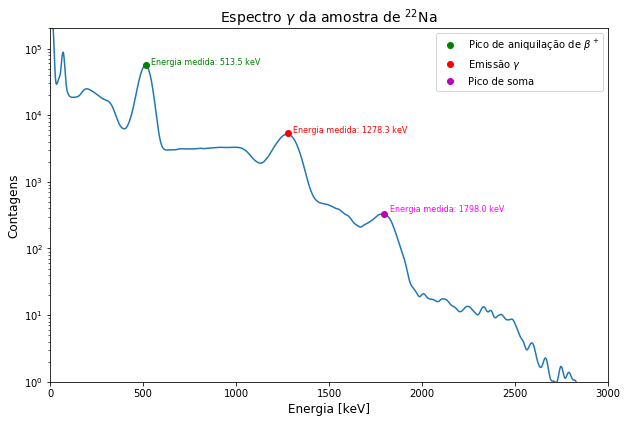

In [9]:
fig = plt.figure(figsize=(10, 6.5))
ax = fig.add_subplot(111)
ax.set_ylim([1, 200000])
ax.set_xlim([0, 3000])
ax.set_yscale('log')

# carrega e suaviza dados para amostra
canais, contagens = load_data(arquivo)
energias = calibracao(canais, pars_calibracao)
contagens_smooth = smooth(contagens, 3)

# carrega picos
peak_xs, peak_ys, peak_xs_err = get_peak_points(arquivo, None)
peak_xs = peak_xs[1:]
peak_ys = peak_ys[1:]
peak_xs_err = peak_xs_err[1:]

title = "Espectro $\gamma$ da amostra de ${}^{22}$Na"
ax.set_title(title, fontsize=14)
ax.set_xlabel("Energia [keV]", fontsize=12)
ax.set_ylabel("Contagens", fontsize=12)
ax.plot(energias, contagens_smooth)
for peak_x, peak_y, peak_x_err in zip(peak_xs, peak_ys, peak_xs_err):
    if np.abs(peak_x - 511) < 10:
        point_label = "Energia medida: {:.1f} keV".format(
                        peak_x, peak_x_err)
        ax.text(peak_x+30, peak_y+30, point_label, color='green', fontsize=8)
        ax.plot(peak_x, peak_y, 'go', label=r"Pico de aniquilação de $\beta^+$")
    elif np.abs(peak_x - 1274) < 10:
        point_label = "Energia medida: {:.1f} keV".format(
                        peak_x, peak_x_err)
        ax.text(peak_x+30, peak_y+30, point_label, color='red', fontsize=8)
        ax.plot(peak_x, peak_y, 'ro', label=r"Emissão $\gamma$")
    elif np.abs(peak_x - 1274 - 511) < 20:
        point_label = "Energia medida: {:.1f} keV".format(
                        peak_x, peak_x_err)
        ax.text(peak_x+30, peak_y+30, point_label, color='magenta', fontsize=8)
        ax.plot(peak_x, peak_y, 'mo', label="Pico de soma")

ax.legend()
fig.savefig("na22.pdf")